### Pembagian dataset dengan skala (.8, .1, .1)

**Dataset ini tentang bahasa isyarat dengan dataset yang diambil oleh diri pribadi bukan dari kaggle atau sejenisnya**

In [ ]:
import splitfolders

splitfolders.ratio(
    "C:/Users/Sinta/Documents/Larskar AI/Submission/Pengembangan Machine Learning/Klasifikasi Gambar/dataset_abjad",
    output=r"C:/Users/Sinta/Documents/Larskar AI/Submission/Pengembangan Machine Learning/Klasifikasi Gambar/dataset",
    seed=1337,
    ratio=(.8, .1, .1),
    group_prefix=None
)


Copying files: 2340 files [01:13, 31.96 files/s]


### Import Lobrary yang dibutuhkan

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


### Data Augmentasi

In [ ]:
# Augmentasi untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validasi & test hanya normalisasi
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load gambar
train_dir = 'dataset/train'
val_dir = 'dataset/val'
test_dir = 'dataset/test'

# Ukuran gambar dan batch
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_generator.class_indices)

Found 1872 images belonging to 26 classes.
Found 234 images belonging to 26 classes.
Found 234 images belonging to 26 classes.


### Modelling dengan CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,522,714 (24.88 MB)

 Trainable params: 6,522,714 (24.88 MB)

 Non-trainable params: 0 (0.00 B)

### Penerapan Callback

In [ ]:
early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    )

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

### Proses training data

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    callbacks = [lr_scheduler],
    epochs=50
)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.0480 - loss: 3.3541 - val_accuracy: 0.0598 - val_loss: 3.2577 - learning_rate: 0.0010
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.0389 - loss: 3.2559 - val_accuracy: 0.0897 - val_loss: 3.2370 - learning_rate: 0.0010
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.0726 - loss: 3.1915 - val_accuracy: 0.1923 - val_loss: 2.7460 - learning_rate: 0.0010
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.1429 - loss: 2.8801 - val_accuracy: 0.1453 - val_loss: 2.7016 - learning_rate: 0.0010
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.2224 - loss: 2.6197 - val_accuracy: 0.4615 - val_loss: 1.7506 - learning_rate: 0.0010
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.3317 - loss: 2.2097 - val_accuracy: 0.5897 - val_loss: 1.3716 - learning_rate: 0.0010
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.4320 - loss: 1.8003 - val_accurac

### Plotting Acc dan Loss

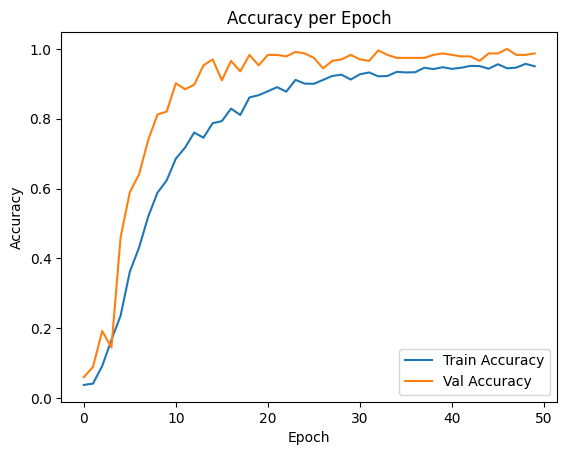

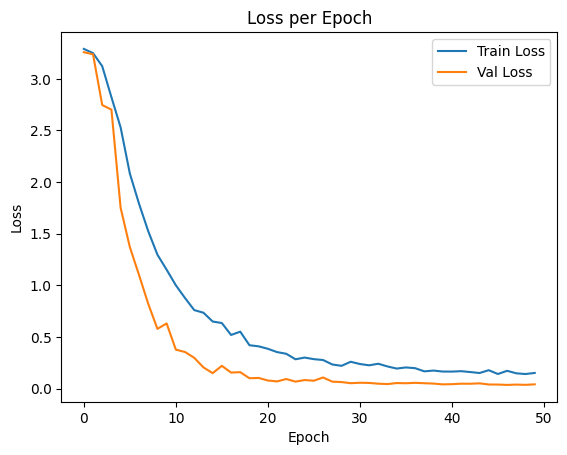

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()


### Evaluasi model

In [ ]:
# Evaluasi
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Accuracy dan Loss Train
train_loss = history.history['loss'][-1]
print(f'Train Loss: {train_loss:.4f}')
train_accuracy = history.history['accuracy'][-1]
print(f'Train Accuracy: {train_accuracy:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9892 - loss: 0.0281
Test Loss: 0.0331
Test Accuracy: 0.9872
Train Loss: 0.1528
Train Accuracy: 0.9503


Evaluasi dengan Confusion Matrix dan Classification Report

8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step


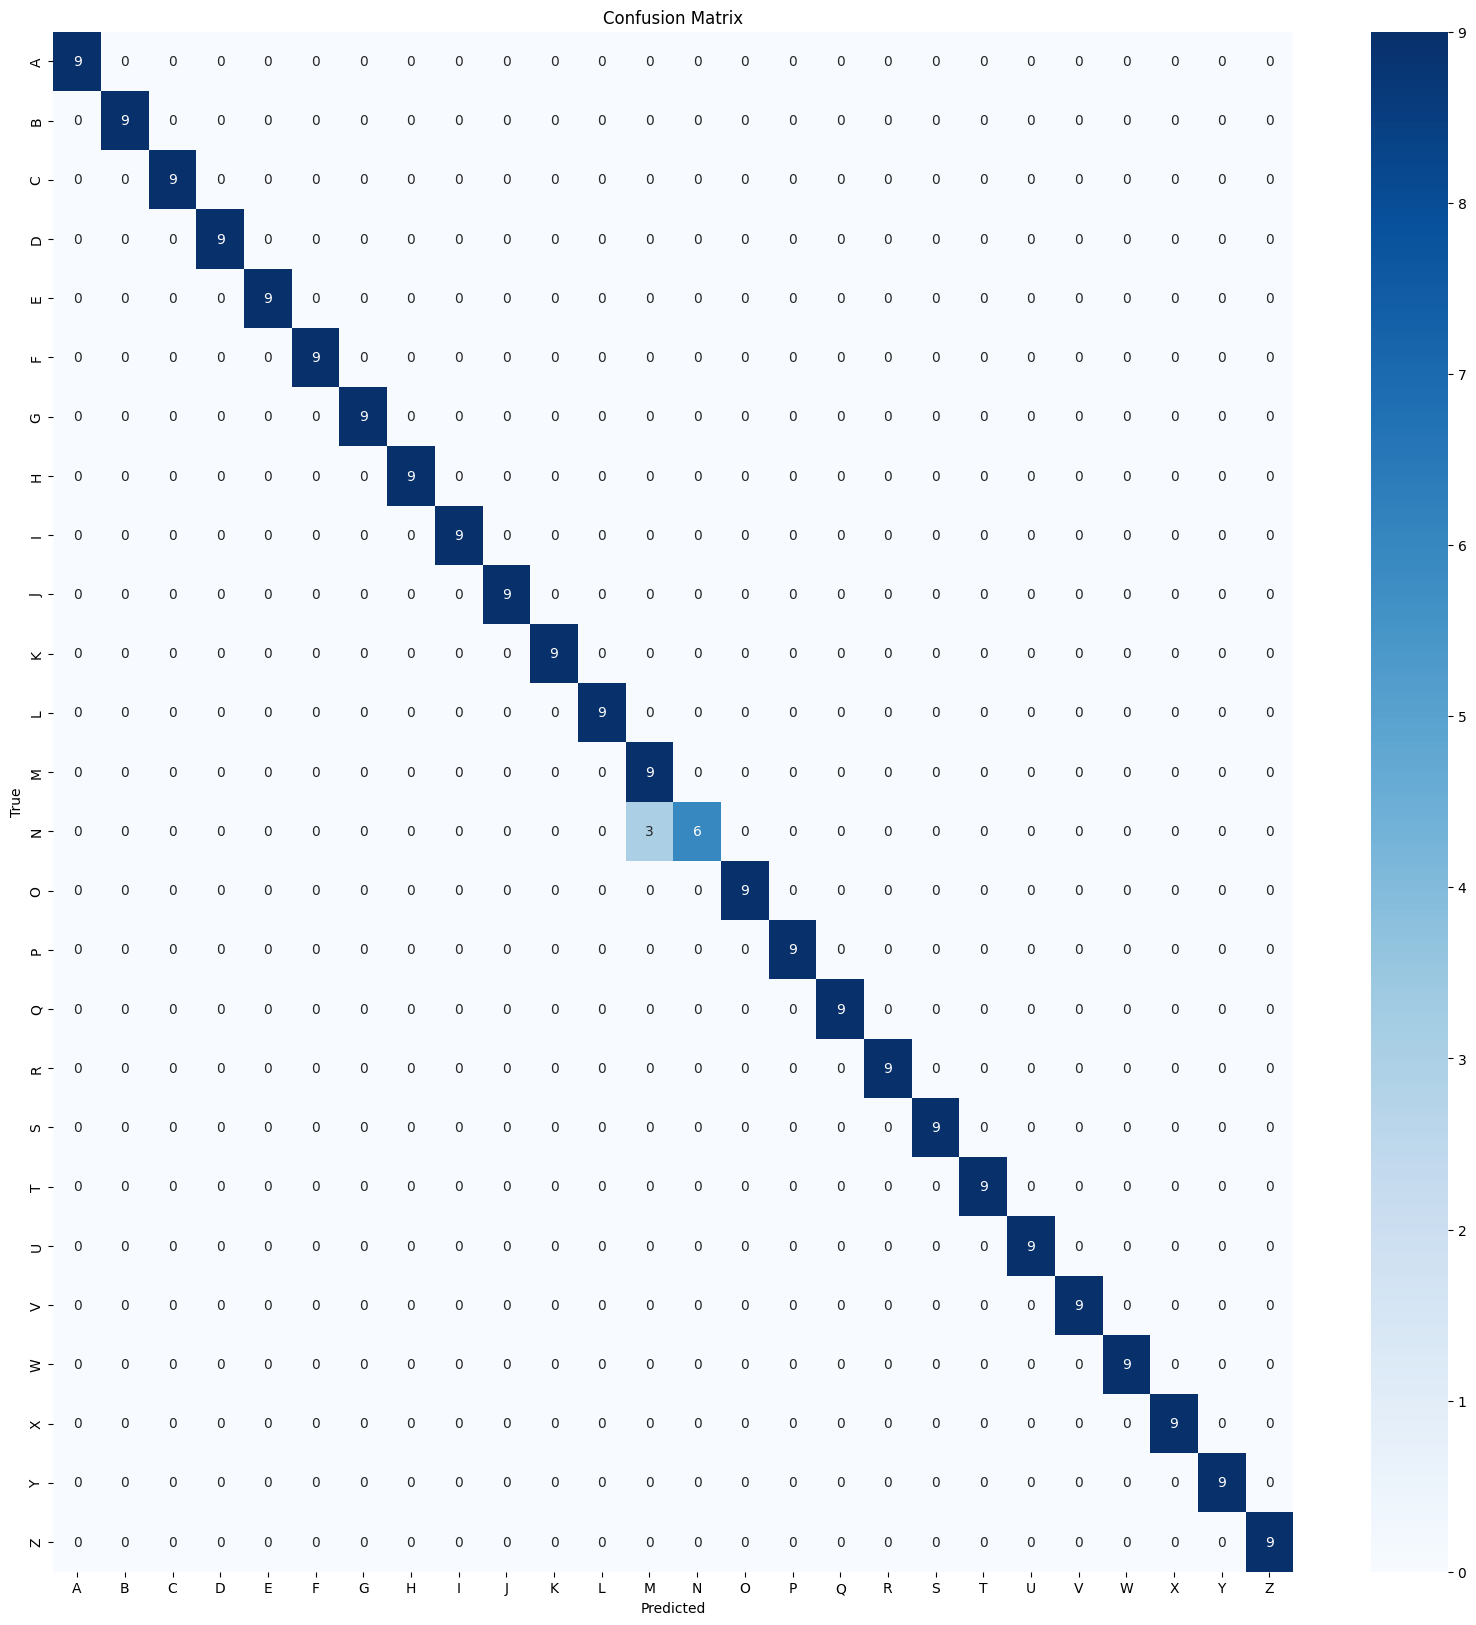

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         9
           B       1.00      1.00      1.00         9
           C       1.00      1.00      1.00         9
           D       1.00      1.00      1.00         9
           E       1.00      1.00      1.00         9
           F       1.00      1.00      1.00         9
           G       1.00      1.00      1.00         9
           H       1.00      1.00      1.00         9
           I       1.00      1.00      1.00         9
           J       1.00      1.00      1.00         9
           K       1.00      1.00      1.00         9
           L       1.00      1.00      1.00         9
           M       0.75      1.00      0.86         9
           N       1.00      0.67      0.80         9
           O       1.00      1.00      1.00         9
           P       1.00      1.00      1.00         9
           Q       1.00      1.00      1.00         9
           R       1.00    

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))


### Menyimpan model dengan beberapa format

#### format SavedModel

In [ ]:
model.export("saved_model")

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2790401901488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2790402223616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049246848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049246672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049248608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049252928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049255568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049255392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049256800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049261296: TensorSpec(shape=(), dtype=tf.resource, name=None)


#### Format TFLite

In [ ]:
import os

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

os.makedirs('tflite', exist_ok=True)

with open('tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)

class_indices = train_generator.class_indices
labels = list(class_indices.keys())  # ambil list nama kelas

with open('tflite/label.txt', 'w') as f:
    for label in labels:
        f.write(label + '\n')

print('Model dan label.txt berhasil disimpan di folder tflite/')

INFO:tensorflow:Assets written to: C:\Users\Sinta\AppData\Local\Temp\tmp827j4fs2\assets


INFO:tensorflow:Assets written to: C:\Users\Sinta\AppData\Local\Temp\tmp827j4fs2\assets


Saved artifact at 'C:\Users\Sinta\AppData\Local\Temp\tmp827j4fs2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2790401901488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2790402223616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049246848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049246672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049248608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049252928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049255568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049255392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049256800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2791049261296: TensorSpec(shape=(), dtype=tf.resource, name=None)
Mod

#### Format TFJS

In [2]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflowjs.converters.converter import tf_saved_model_conversion_v2 as convert

saved_model_dir = '/content/drive/MyDrive/Colab Notebooks/tfjs_model/saved_model'
output_dir = '/content/drive/MyDrive/Colab Notebooks/tfjs_model/tfjs_model'

convert.convert_tf_saved_model(saved_model_dir, output_dir)

Mounted at /content/drive


### inference dengan menggunakan format TFLite

c:\Users\Sinta\anaconda3\envs\laskarai\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


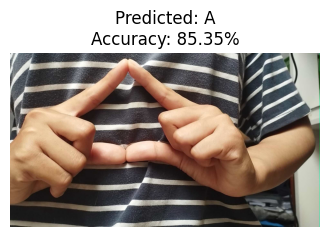

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image as PILImage
import os

# --- Path ke folder tflite ---
tflite_folder_path = r'C:\Users\Sinta\Documents\Larskar AI\Submission\Pengembangan Machine Learning\Klasifikasi Gambar\tflite'
model_path = os.path.join(tflite_folder_path, 'model.tflite')
label_path = os.path.join(tflite_folder_path, 'label.txt')

# --- Load model TFLite ---
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# --- Load labels ---
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        labels = [line.strip() for line in f.readlines()]
else:
    labels = None

# --- Ambil detail input dan output ---
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']
img_height = input_shape[1]
img_width = input_shape[2]

# --- Preprocessing image ---
def preprocess_image(img):
    img = img.resize((img_width, img_height))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype(np.float32)
    return img_array

# --- Input path gambar ---
image_path_input = input("Masukkan path gambar yang ingin diprediksi: ")

if os.path.exists(image_path_input):
    img = PILImage.open(image_path_input).convert('RGB')
    img_array = preprocess_image(img)

    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_class_idx = np.argmax(output_data, axis=1)[0]
    predicted_accuracy = np.max(output_data) * 100

    # Cek apakah label tersedia
    if labels:
        predicted_label = labels[predicted_class_idx]
    else:
        predicted_label = f'Class {predicted_class_idx}'

    # --- Tampilkan hasil ---
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(img)
    ax.axis('off')
    plt.title(f'Predicted: {predicted_label}\nAccuracy: {predicted_accuracy:.2f}%', fontsize=12)
    plt.show()
else:
    print("Path yang dimasukkan tidak valid atau file tidak ditemukan.")
